In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test)= mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOnehot = np_utils.to_categorical(y_Test)

In [3]:
from keras.models import Sequential
from keras.layers import  Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [4]:
model = Sequential()
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))#dropout maybe can change
model.add(Dense(10, activation='softmax'))
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
______________________________________

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,
                       y=y_TrainOneHot,validation_split=0.2,
                       epochs=10, batch_size=300,verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.3831 - accuracy: 0.8829 - val_loss: 0.0903 - val_accuracy: 0.9729
Epoch 2/10
 - 3s - loss: 0.0964 - accuracy: 0.9701 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 3/10
 - 3s - loss: 0.0683 - accuracy: 0.9789 - val_loss: 0.0476 - val_accuracy: 0.9856
Epoch 4/10
 - 3s - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 5/10
 - 3s - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0402 - val_accuracy: 0.9882
Epoch 6/10
 - 3s - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0401 - val_accuracy: 0.9877
Epoch 7/10
 - 3s - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0387 - val_accuracy: 0.9884
Epoch 8/10
 - 3s - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0377 - val_accuracy: 0.9898
Epoch 9/10
 - 3s - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0322 - val_accuracy: 0.9907
Epoch 10/10
 - 3s - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0325 - val_accuracy: 0.9916


In [6]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

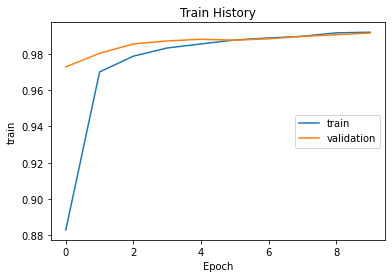

In [7]:
show_train_history(train_history,'accuracy','val_accuracy')

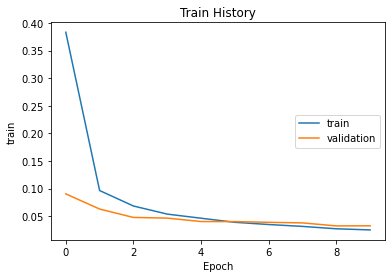

In [8]:
show_train_history(train_history, 'loss','val_loss')

In [9]:
scores = model.evaluate(x_Test4D_normalize , y_TestOnehot)
scores[1]

10000/10000 [==============================] - 1s 67us/step


0.9919000267982483

In [10]:
predicition=model.predict_classes (x_Test4D_normalize)

In [11]:
predicition[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [16]:
import pandas as pd
prediction = model.predict_classes(x_Test4D_normalize)
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,1,0,0,2,0,2,0
1,0,1124,1,2,0,1,3,1,3,0
2,1,0,1025,0,1,0,0,3,2,0
3,0,0,1,1006,0,1,0,0,2,0
4,0,0,0,0,977,0,1,0,1,3
5,2,0,1,4,0,880,3,0,1,1
6,1,2,0,0,1,1,952,0,1,0
7,1,1,5,1,0,0,0,1019,1,0
8,2,0,1,1,0,0,0,1,968,1
